In [ ]:
import tensorflow as tf
import  numpy as np
import keras
from keras.layers import Dense

In [ ]:
c = np.array([-40, -10, 0, 8, 15, 22, 38])
f = np.array([-40, 14, 32, 46, 59, 72, 100])

In [ ]:
model = keras.Sequential()

In [ ]:
model.add(Dense(units=1, input_shape=(1, ), activation='linear'))

In [ ]:
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(0.1))

In [ ]:
reg = model.fit(c, f, epochs=500, verbose=False)

In [ ]:
from matplotlib import pyplot as plt
plt.plot(reg.history['loss'])

In [ ]:
print(model.predict([100]))

In [ ]:
print(model.get_weights())

импорт нужных библиотек

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from keras.layers import Dense, Flatten
from keras.datasets import mnist, fashion_mnist

считавание данных mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

стандартизация

In [4]:
X_train = X_train / 255
X_test = X_test / 255

Вывод примера фотографий

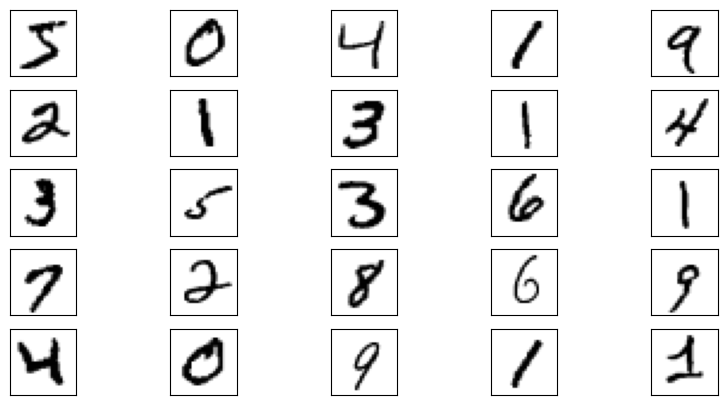

In [5]:
plt.figure(figsize=(10, 5))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i], cmap=plt.cm.binary)
plt.show()

Переводим в правильный формат вывода
Пример:
0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
...
9 -> [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


In [6]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

Создаем полносвязную НС с:
* 28x28 = 784 нейронов входного слоя
* 128 нейронов скрытого слоя
* 10 нейронов выходного слоя

In [7]:
model = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


компиляция модели

In [8]:
model.compile(optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy'])

Тренировка модели

In [9]:
model.fit(X_train, y_train_cat, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10


1500/1500 [==============================] - 5s 2ms/step - loss: 0.2932 - accuracy: 0.9154 - val_loss: 0.1542 - val_accuracy: 0.9540
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1312 - accuracy: 0.9617 - val_loss: 0.1174 - val_accuracy: 0.9653
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0895 - accuracy: 0.9732 - val_loss: 0.1180 - val_accuracy: 0.9642
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0649 - accuracy: 0.9803 - val_loss: 0.0933 - val_accuracy: 0.9722
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0508 - accuracy: 0.9843 - val_loss: 0.0939 - val_accuracy: 0.9720
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0391 - accuracy: 0.9880 - val_loss: 0.1006 - val_accuracy: 0.9687
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0313 - accuracy: 0.9905 - val_loss: 0.0928 - val_accurac

проверка работы сети на тестовом множестве

In [10]:
model.evaluate(X_test, y_test_cat)

313/313 [==============================] - 1s 1ms/step - loss: 0.0901 - accuracy: 0.9746


[0.09009759873151779, 0.9746000170707703]

Пример выходных значений сети, ее предсказание и картинка для которой предсказали

1/1 [==============================] - 0s 110ms/step
[[4.7589668e-11 9.3068267e-14 3.8300766e-07 2.9683247e-06 2.2418762e-14
  1.0312581e-11 1.2540029e-17 9.9999666e-01 2.5151887e-09 8.2589011e-09]]
7


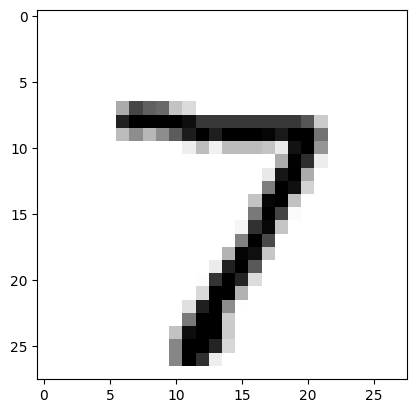

In [11]:
n = 0
x = np.expand_dims(X_test[n], axis=0)
res = model.predict(x)
print(res)
print(np.argmax(res))
plt.imshow(X_test[n], cmap=plt.cm.binary)
plt.show()

In [12]:
pred = model.predict(X_test)
pred = np.argmax(pred, axis=1)
print(pred.shape)

print(pred[:20])
print(y_test[:20])

313/313 [==============================] - 0s 1ms/step
(10000,)
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


Сформируем маску, которая будет содержать True для верных вариантов и False – для неверных. И с помощью этой маски выделим из тестовой выборки все неверные результаты

In [13]:
mask = pred == y_test
print(mask[:10])

x_false = X_test[~mask]
y_false = X_test[~mask]

print(x_false.shape)

[ True  True  True  True  True  True  True  True  True  True]
(254, 28, 28)


Вывод неверно предсказанных

Значение сети: 7


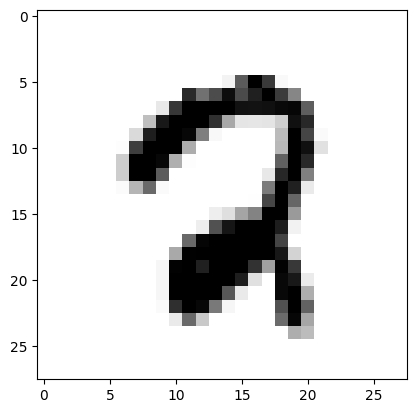

Значение сети: 2


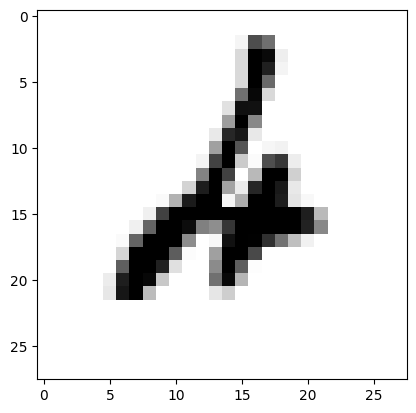

Значение сети: 1


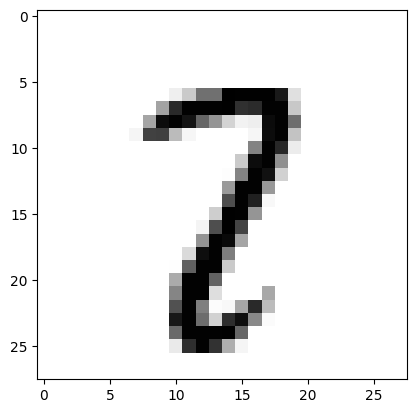

Значение сети: 0


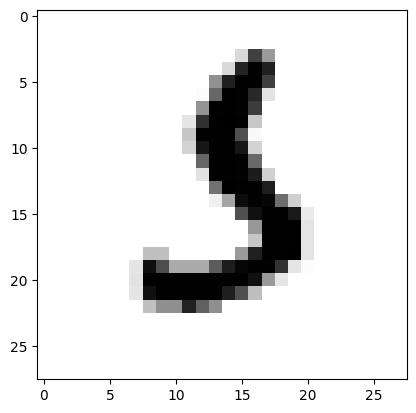

Значение сети: 4


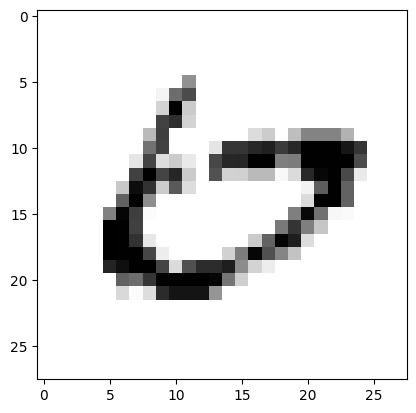

In [14]:
for i in range(5):
  print("Значение сети: "+str(y_test[i]))
  plt.imshow(x_false[i], cmap=plt.cm.binary)
  plt.show()